In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat       # Import function to read data.
data = loadmat('Ch3_d2.mat')
f = data['d']
print(f)

[[0 1 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]]


In [52]:
np.shape(f)

(1000, 500)

QUESTION 1: CALCULATE AVERAGE NUMBER OF SPIKES PER TRIAL

In [53]:
n_trials = np.shape(f)[0]
T = np.shape(f)[1]
print(n_trials)
print(T)

1000
500


In [54]:
n_spikes_per_trial = np.sum(f,1) 
print(n_spikes_per_trial[0:2])
np.shape(n_spikes_per_trial)

[ 7 14]


(1000,)

In [55]:
n_avg = np.mean(n_spikes_per_trial)
print("The average number of spikes per trial is", n_avg)

The average number of spikes per trial is 12.075


THE AVERAGE FIRING RATE:

In [56]:
duration_of_a_trial_in_seconds = 0.5
avg_firing_rate = n_avg / duration_of_a_trial_in_seconds
print("The average firing rate is", avg_firing_rate, "HZ")

The average firing rate is 24.15 HZ


AVERAGE ISI:

In [57]:
duration_of_a_trial_in_seconds = 0.5
avg_firing_rate = n_avg / duration_of_a_trial_in_seconds
print(avg_firing_rate)

ISI = [];                                   #Empty variable to hold ISIs
for k in range (n_trials):                  #For each trial:
    spike_times = np.where(f[k,:] == 1);    #................ find indices where spikes occur
    isi0 = np.diff(spike_times);            #................ get the difference between indices (ISIs) 
    ISI = np.concatenate([ISI, isi0[0]]);   #................ and append this to list of all ISIs. 

24.15


In [58]:
mean_ISI = np.mean(ISI)
print("The average ISI is", mean_ISI, "s.")

The average ISI is 35.62446952595937 s.


FANO:

In [59]:
fano = np.var(n_spikes_per_trial)/ np.mean(n_spikes_per_trial)
print("The Fano factor is", fano)

The Fano factor is 1.0084782608695653


QUESTION 2: Compute and plot SNH, ISI histogram, and PSTH. Mark the average on each plot.

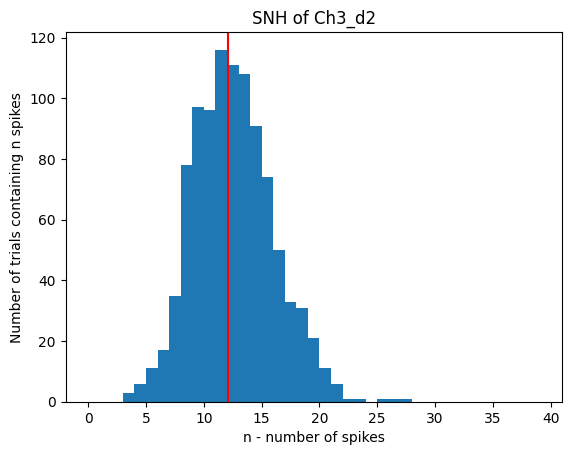

In [60]:
#THE SNH
plt.hist(n_spikes_per_trial, np.arange(40))
plt.xlabel('n - number of spikes')
plt.ylabel('Number of trials containing n spikes')
plt.title('SNH of Ch3_d2');
plt.axvline(n_avg, color='r');
plt.show()

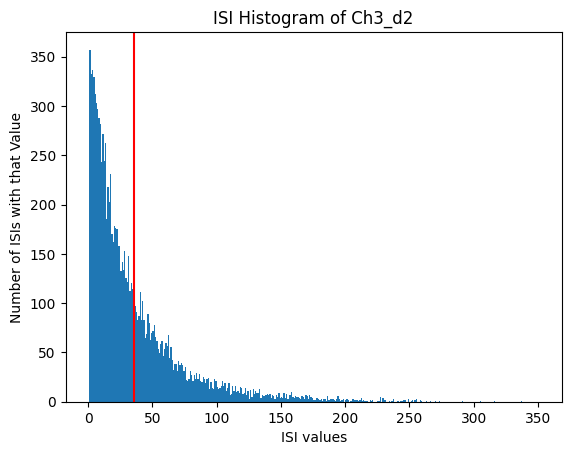

In [61]:
#THE ISI
plt.hist(ISI, np.arange(np.max(ISI))); 
plt.xlabel('ISI values')
plt.ylabel('Number of ISIs with that Value')
plt.title('ISI Histogram of Ch3_d2')
plt.axvline(mean_ISI, color='r');
plt.show()

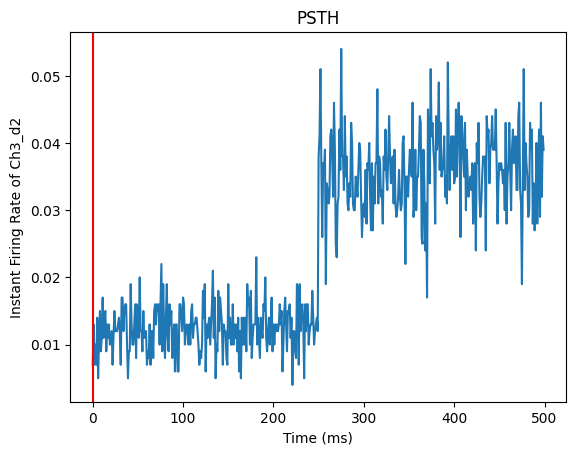

In [62]:
#PSTH
prob_spike = np.sum(f,0)/n_trials; #this will give us the probabiliy of a spike at any moment in time
mean_prob_spike = np.mean(prob_spike)

dt = 00.1 #this is the uhhh time between samples in [s] == 1 ms
instant_firing_rate = prob_spike/dt
plt.plot(prob_spike)
#what is the firing rate approximately? what should the axes be?
plt.xlabel('Time (ms)')
plt.ylabel('Instant Firing Rate of Ch3_d2')
plt.title('PSTH')
plt.axvline(mean_prob_spike, color='r');

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]
1000
500


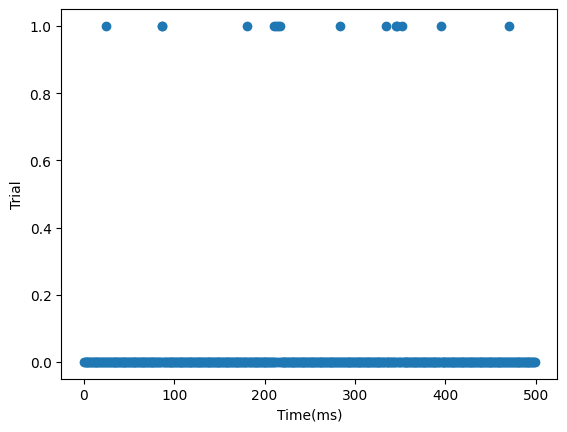

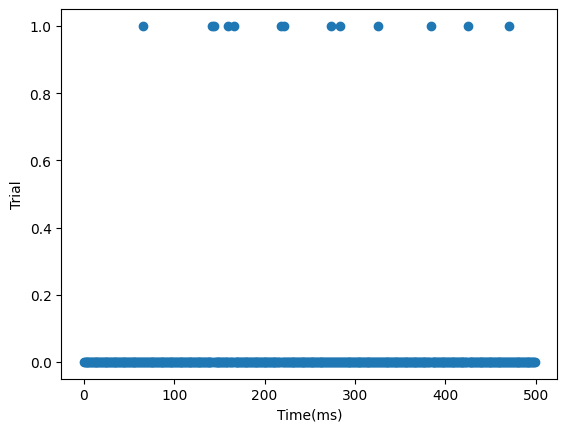

[15 13]
12.344


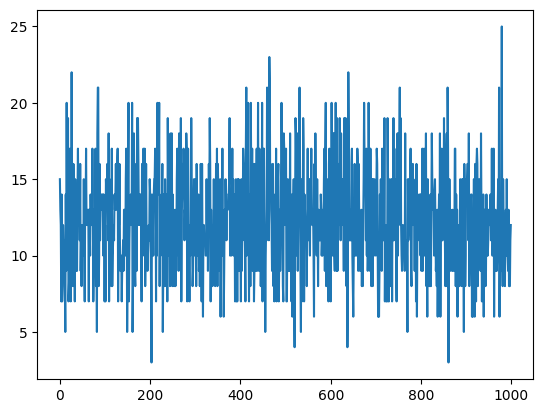

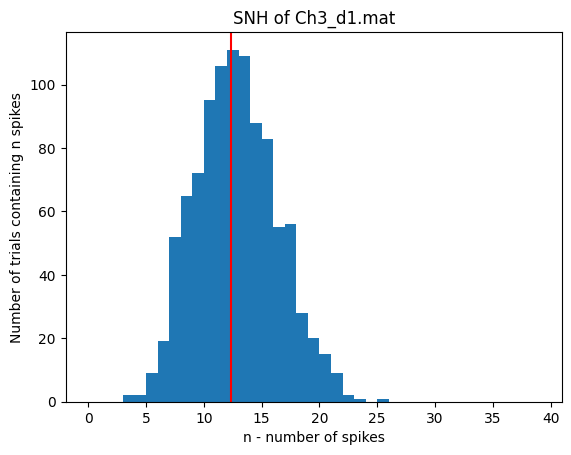

0.024687999999999998
24.688
24.688
(array([ 66, 142, 144, 160, 166, 218, 221, 273, 283, 326, 384, 425, 470],
      dtype=int64),)
[[76  2 16  6 52  3 52 10 43 58 41 45]]
36.952485895627646


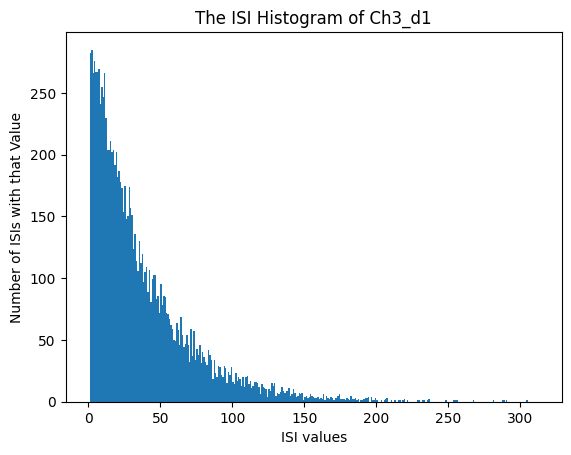

[0.023 0.031 0.026 0.023 0.022 0.034 0.029 0.025 0.019 0.035 0.026 0.024
 0.023 0.02  0.027 0.022 0.03  0.033 0.023 0.019 0.026 0.027 0.022 0.033
 0.025 0.025 0.032 0.03  0.016 0.018 0.027 0.024 0.029 0.028 0.018 0.025
 0.032 0.023 0.024 0.025 0.03  0.02  0.026 0.029 0.027 0.025 0.023 0.025
 0.015 0.021 0.023 0.035 0.028 0.024 0.019 0.014 0.03  0.028 0.025 0.019
 0.013 0.027 0.024 0.027 0.022 0.027 0.021 0.016 0.017 0.026 0.022 0.031
 0.025 0.026 0.021 0.023 0.019 0.026 0.035 0.027 0.023 0.023 0.027 0.027
 0.023 0.023 0.029 0.023 0.023 0.019 0.015 0.02  0.028 0.019 0.038 0.025
 0.029 0.015 0.018 0.031 0.022 0.03  0.022 0.028 0.024 0.017 0.028 0.034
 0.027 0.021 0.021 0.021 0.032 0.027 0.022 0.022 0.024 0.021 0.024 0.031
 0.023 0.03  0.02  0.027 0.026 0.027 0.027 0.029 0.025 0.027 0.026 0.028
 0.026 0.026 0.031 0.018 0.025 0.024 0.022 0.028 0.019 0.024 0.025 0.028
 0.025 0.022 0.033 0.028 0.029 0.021 0.02  0.028 0.022 0.023 0.024 0.031
 0.028 0.016 0.028 0.025 0.017 0.025 0.022 0.03  0.

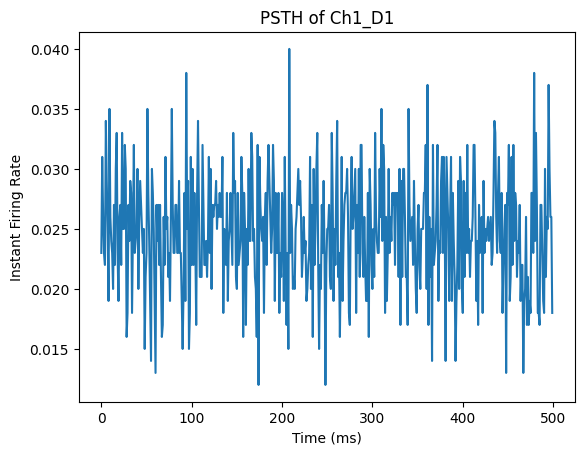

1.0066156837329878


In [63]:
%run "topic4.ipynb"

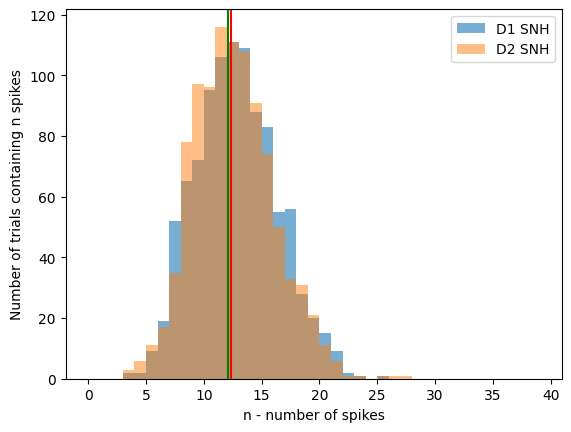

In [69]:
plt.hist(dn_spikes_per_trial, np.arange(40), alpha = 0.6, label='D1 SNH')
plt.axvline(dn_avg, color='r');
plt.hist(n_spikes_per_trial, np.arange(40), alpha = 0.5, label='D2 SNH')
plt.axvline(n_avg, color='g');
plt.xlabel('n - number of spikes')
plt.ylabel('Number of trials containing n spikes')
plt.legend()
plt.show()

Comparing the SNH of D1 and D2, we can see that the two datasets have a pretty similar distribution and average number of spikes per trial. Looking more closely, it can be noticed that D2 has a larger amount of a lower number of spikes in more trials than D1. That's a bit confusing to explain here, so making another graph: 

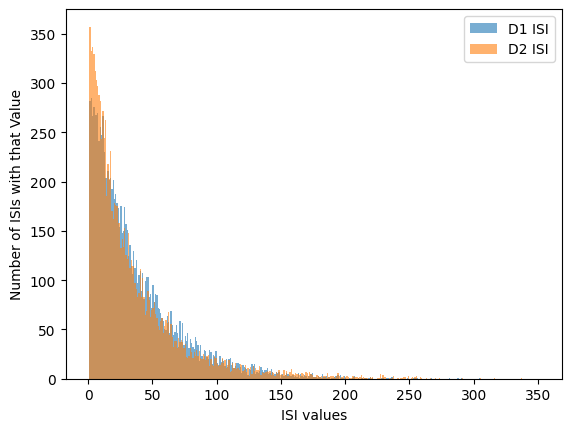

In [72]:
plt.hist(dISI, np.arange(np.max(dISI)), alpha = 0.6, label='D1 ISI');
plt.hist(ISI, np.arange(np.max(ISI)), alpha = 0.6, label='D2 ISI');
plt.xlabel('ISI values')
plt.ylabel('Number of ISIs with that Value')
plt.legend()
plt.show()

D2 has a larger number of ISIs of 0 or less than (approx.) 25 (exceeding 300ms). Still a bit difficult to see any other major differences.

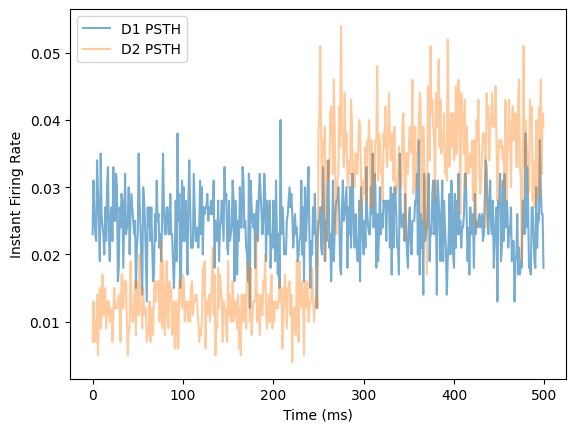

In [70]:
plt.plot(dprob_spike, label='D1 PSTH', alpha = 0.6, )
plt.plot(prob_spike, label='D2 PSTH', alpha = 0.4, )
plt.xlabel('Time (ms)')
plt.ylabel('Instant Firing Rate')
plt.legend()

Here we graph the probability of a spike at moment in time for D1(blue) and D2(orange). When we do this, we can clearly see some differences in activity between D1 and D2. D1 has a very stable probablity of a spike at any moment in time across 500ms. D2 has a lower probability of a spike any moment in time before around 250ms, which is when the probability of a spike at any moment for D2 increases sharply. Perhaps this is happening in response to some kind of change in neural activity, maybe in response to a stimulus or some network-level changes. 

D1 probably represents a more consistent and stable neural activity rate, perhaps representing a baseline activity level or a response to a continous input? 

SIMULATING COIN FLIPS:

In [73]:
#GENERATE COIN FLIPS
number_trials = 100;
TK = 500; #TK is number of biased coin flips 
data_coins = np.zeros([number_trials, TK]);

P = 0.01; #making our coin biased - p of drawing 1 is equal to 0.01 

for k in np.arange(number_trials): #for each trial
    spikes = np.zeros([TK,1]);              #make an empty vector for spikes
    for i in np.arange(TK):                 #and for each time,
        spikes[i] = np.random.binomial(1,P);#flip the coin and save the results in spikes
    data_coins[k:] = np.transpose(spikes);  #then save this trial within data_coins

In [79]:
dc_n_trials = np.shape(data_coins)[0]
dcT = np.shape(data_coins)[1]
print(dc_n_trials)
print(dcT)

100
500


In [82]:
#Q1 avg spikes
dc_n_spikes_per_trial = np.sum(data_coins,1)
dc_avg = np.mean(dc_n_spikes_per_trial)
print('The average number of spikes per trial is', dc_avg, 'spikes per trial')

The average number of spikes per trial is 5.11


In [83]:
#Q1 average firing rate 
dc_avg_firing_rate = dc_avg / dcT
print('The average firing rate is ', dc_avg_firing_rate*1000, 'hZ')

The average firing rate is  10.22 hZ


In [88]:
#Q1 average ISI
dcISI = [];
for k in range (dc_n_trials):
    dc_spike_times = np.where(data_coins[k,:] == 1);
    dcISI0 = np.diff(dc_spike_times);
    dcISI = np.concatenate([dcISI, dcISI0[0]]);

mean_dcISI = np.mean(dcISI)
print('The mean ISI is', mean_dcISI)

The mean ISI is 75.50363196125907


In [89]:
#Q1 fano factor 
dc_fano = np.var(dc_n_spikes_per_trial)/ np.mean(dc_n_spikes_per_trial)
print('The fano factor for our coin flip data is', dc_fano)

The fano factor for our coin flip data is 1.1072211350293542


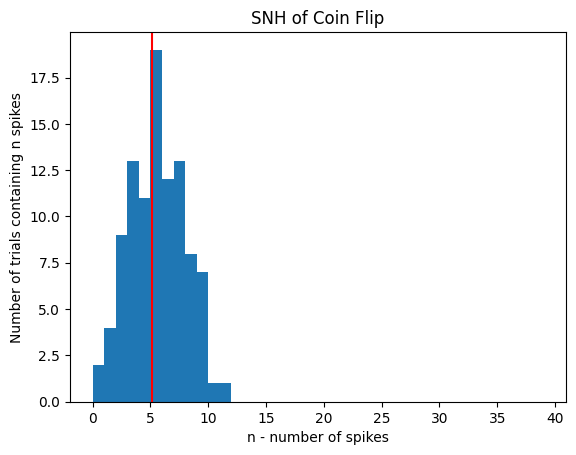

In [91]:
#Q3: SNH
plt.hist(dc_n_spikes_per_trial, np.arange(40))
plt.xlabel('n - number of spikes')
plt.ylabel('Number of trials containing n spikes')
plt.title('SNH of Coin Flip');
plt.axvline(dc_avg, color='r');

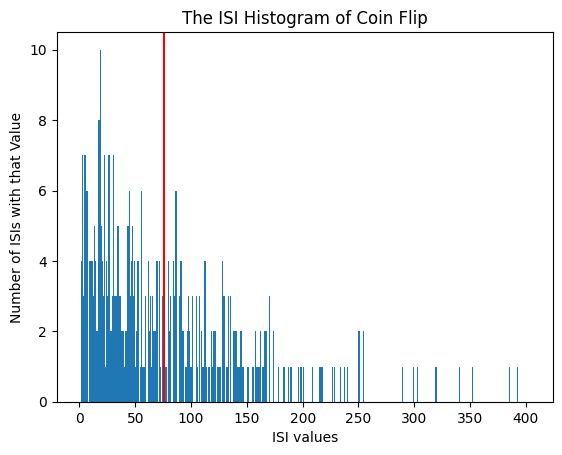

In [95]:
#Q3: ISI
plt.hist(dcISI, np.arange(np.max(dcISI))); 
plt.xlabel('ISI values')
plt.ylabel('Number of ISIs with that Value')
plt.title('The ISI Histogram of Coin Flip')
plt.axvline(mean_dcISI, color='r'); 

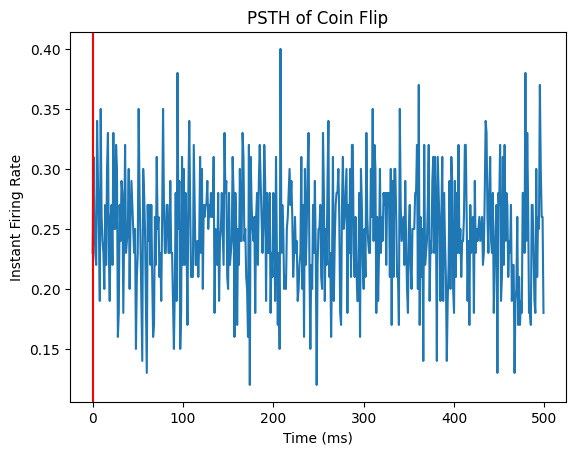

In [96]:
#Q4: PSTH
dc_prob_spike = np.sum(d,0)/dc_n_trials;
dc_avg_prob_spike = np.mean(dc_prob_spike)

dtt = 00.1 
dc_instant_firing_rate = dc_prob_spike/dtt
plt.plot(dc_prob_spike)
plt.xlabel('Time (ms)')
plt.ylabel('Instant Firing Rate')
plt.title('PSTH of Coin Flip')
plt.axvline(dc_avg_prob_spike, color='r')